In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


color_palette = {
    # Top 5 Subfields (Higher Relevance)
    "Artificial Intelligence": "#D32F2F",
    "Computer Vision and Pattern Recognition": "#1976D2",
    "Information Systems": "#2E7D32",
    "Computational Theory and Mathematics": "#6A1B9A",
    "Computer Networks and Communications": "#FF6F00",
    
    # Additional Subfields
    "Computer Science Applications": "#00838F",
    "Software": "#0ad600",
    "Signal Processing": "#2CCFDB",
    "Human-Computer Interaction": "#CE59D4",
    "Hardware and Architecture": "#455A64",
    "Computer Graphics and Computer-Aided Design": "#D6914B"
}

country_ids = {
    "BR": "Brazil",
    "US": "United States",
    "CN": "China",
    "ID": "Indonesia",
}


def plot_publication_percentages_by_country(df):
    """
    Reads the aggregated publication counts CSV and creates a line plot for each country.
    For each country, it computes the percentage of publications per subfield (i.e.,
    number of publications of a subfield divided by the total publications for that year)
    for the top 5 subfields, and plots these percentages over the years 2019 to 2024.
    A common legend is displayed at the bottom.
    """
    # Load the CSV file and ensure publication_year is integer
    df["publication_year"] = df["publication_year"].astype(int)

    # Get unique country codes
    countries = df["country_code"].unique()

    # Setup seaborn theme for better visuals
    sns.set_theme(style="whitegrid", context="paper", font_scale=2.2)

    # Create a subplot grid: here we assume 4 countries and use a 2x2 grid (adjust as needed)
    n_countries = len(countries)
    n_rows = (n_countries + 1) // 2
    fig, axes = plt.subplots(
        n_rows, 2, figsize=(16, 5 * n_rows), sharex=True, sharey=True
    )
    axes = axes.flatten()

    # Dictionary to collect legend entries across subplots
    legend_entries = {}

    for i, country in enumerate(countries):
        ax = axes[i]
        # Filter data for the current country and work on a copy
        df_country = df[df["country_code"] == country].copy()

        # Compute the total publications per year for this country
        total_per_year = (
            df_country.groupby("publication_year")["count"]
            .sum()
            .reset_index(name="total")
        )
        df_country = df_country.merge(total_per_year, on="publication_year")

        # Calculate the percentage of publications for each subfield per year
        df_country["percentage"] = (df_country["count"] / df_country["total"]) * 100

        # Determine top 5 subfields (by total count over the period for that country)
        subfield_totals = (
            df_country.groupby("subfield_display_name")["count"].sum().reset_index()
        )
        top5 = subfield_totals.nlargest(5, "count")["subfield_display_name"].tolist()

        # Filter to only include rows for these top subfields
        df_top = df_country[df_country["subfield_display_name"].isin(top5)]

        # Create the line plot for percentages by publication year for the top subfields
        lineplot = sns.lineplot(
            data=df_top,
            x="publication_year",
            y="percentage",
            hue="subfield_display_name",
            palette=color_palette,  # <--- Added palette mapping
            style="subfield_display_name",
            markers=True,
            markersize=8,
            dashes=False,
            ax=ax,
            linewidth=1.5,
        )
        ax.set_title(f"Country: {country_ids[country]}")
        ax.set_xlabel("Publication Year")
        ax.set_ylabel("Percentage (%)")

        # Remove individual legends from subplots
        ax.get_legend().remove()

        # Collect legend handles and labels from the first subplot (assuming consistency across plots)
        if i == 0:
            handles, labels = lineplot.get_legend_handles_labels()
            for h, l in zip(handles, labels):
                legend_entries[l] = h

    # Hide any unused subplots if number of countries is less than the grid size
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Create a common legend from the collected legend entries
    common_labels = sorted(legend_entries.keys())
    common_handles = [legend_entries[label] for label in common_labels]
    fig.legend(
        common_handles,
        common_labels,
        loc="lower center",
        ncol=3,
        bbox_to_anchor=(0.5, -0.02),
    )


    fig.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig(
        "../docs/publication_percentages_by_country.pdf",
        format="pdf",
        bbox_inches="tight",
    )

    return fig


# def plot_avg_citations_by_country(df):
#     """
#     Reads the aggregated publication counts CSV (for Brazil) and creates a line plot for each country.
#     For each country, it computes the average citations per publication for each subfield per year
#     (i.e., citation_count / count) for the top 5 subfields (by total publication count)
#     and plots these average citations over the years 2019 to 2024.
#     A common legend is displayed at the bottom.
#     """
#     # Ensure publication_year is integer
#     df["publication_year"] = df["publication_year"].astype(int)

#     # Compute average citations per publication for each row
#     df["avg_citations"] = df["citation_count"] / df["count"]

#     # Get unique country codes (should be one, but keeping the structure for consistency)
#     countries = df["country_code"].unique()

#     # Setup seaborn theme for better visuals
#     sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

#     # Create a subplot grid: here we assume 4 countries and use a 2x2 grid (adjust as needed)
#     n_countries = len(countries)
#     n_rows = (n_countries + 1) // 2
#     fig, axes = plt.subplots(
#         n_rows, 2, figsize=(15, 5 * n_rows), sharex=True, sharey=True
#     )
#     axes = axes.flatten()

#     # Dictionary to collect legend entries across subplots
#     legend_entries = {}

#     for i, country in enumerate(countries):
#         ax = axes[i]
#         # Filter data for the current country and work on a copy
#         df_country = df[df["country_code"] == country].copy()

#         # Determine top 5 subfields (by total publication count over the period for that country)
#         subfield_totals = (
#             df_country.groupby("subfield_display_name")["count"].sum().reset_index()
#         )
#         top5 = subfield_totals.nlargest(5, "count")["subfield_display_name"].tolist()

#         # Filter to only include rows for these top subfields
#         df_top = df_country[df_country["subfield_display_name"].isin(top5)]

#         # Create the line plot for average citations per publication by publication year for the top subfields
#         lineplot = sns.lineplot(
#             data=df_top,
#             x="publication_year",
#             y="avg_citations",
#             hue="subfield_display_name",
#             palette=color_palette,  # <--- Added palette mapping
#             style="subfield_display_name",
#             markers=True,
#             markersize=8,
#             dashes=False,
#             ax=ax,
#             linewidth=1.5,
#         )
#         ax.set_title(f"Country: {country_ids[country]}")
#         ax.set_xlabel("Publication Year")
#         ax.set_ylabel("Average Citations")

#         # Remove individual legends from subplots
#         ax.get_legend().remove()

#         # Collect legend handles and labels from the first subplot (assuming consistency across plots)
#         if i == 0:
#             handles, labels = lineplot.get_legend_handles_labels()
#             for h, l in zip(handles, labels):
#                 legend_entries[l] = h

#     # Hide any unused subplots if number of countries is less than the grid size
#     for j in range(i + 1, len(axes)):
#         axes[j].axis("off")

#     # Create a common legend from the collected legend entries
#     common_labels = sorted(legend_entries.keys())
#     common_handles = [legend_entries[label] for label in common_labels]
#     fig.legend(
#         common_handles,
#         common_labels,
#         loc="lower center",
#         ncol=5,
#         bbox_to_anchor=(0.5, 0.01),
#     )

#     # fig.suptitle(
#     #     "Average Citations per Publication by Subfield (2019 - 2024)",
#     #     fontsize=16,
#     #     y=0.93,
#     # )

#     fig.tight_layout(rect=[0, 0.05, 1, 0.95])
#     plt.savefig(
#         "../docs/avg_citations_by_country.pdf", format="pdf", bbox_inches="tight"
#     )

#     return fig

In [30]:
countries_subfields_df = pd.read_csv(
    "../data/csv/openalex/countries_subfields.csv"
)

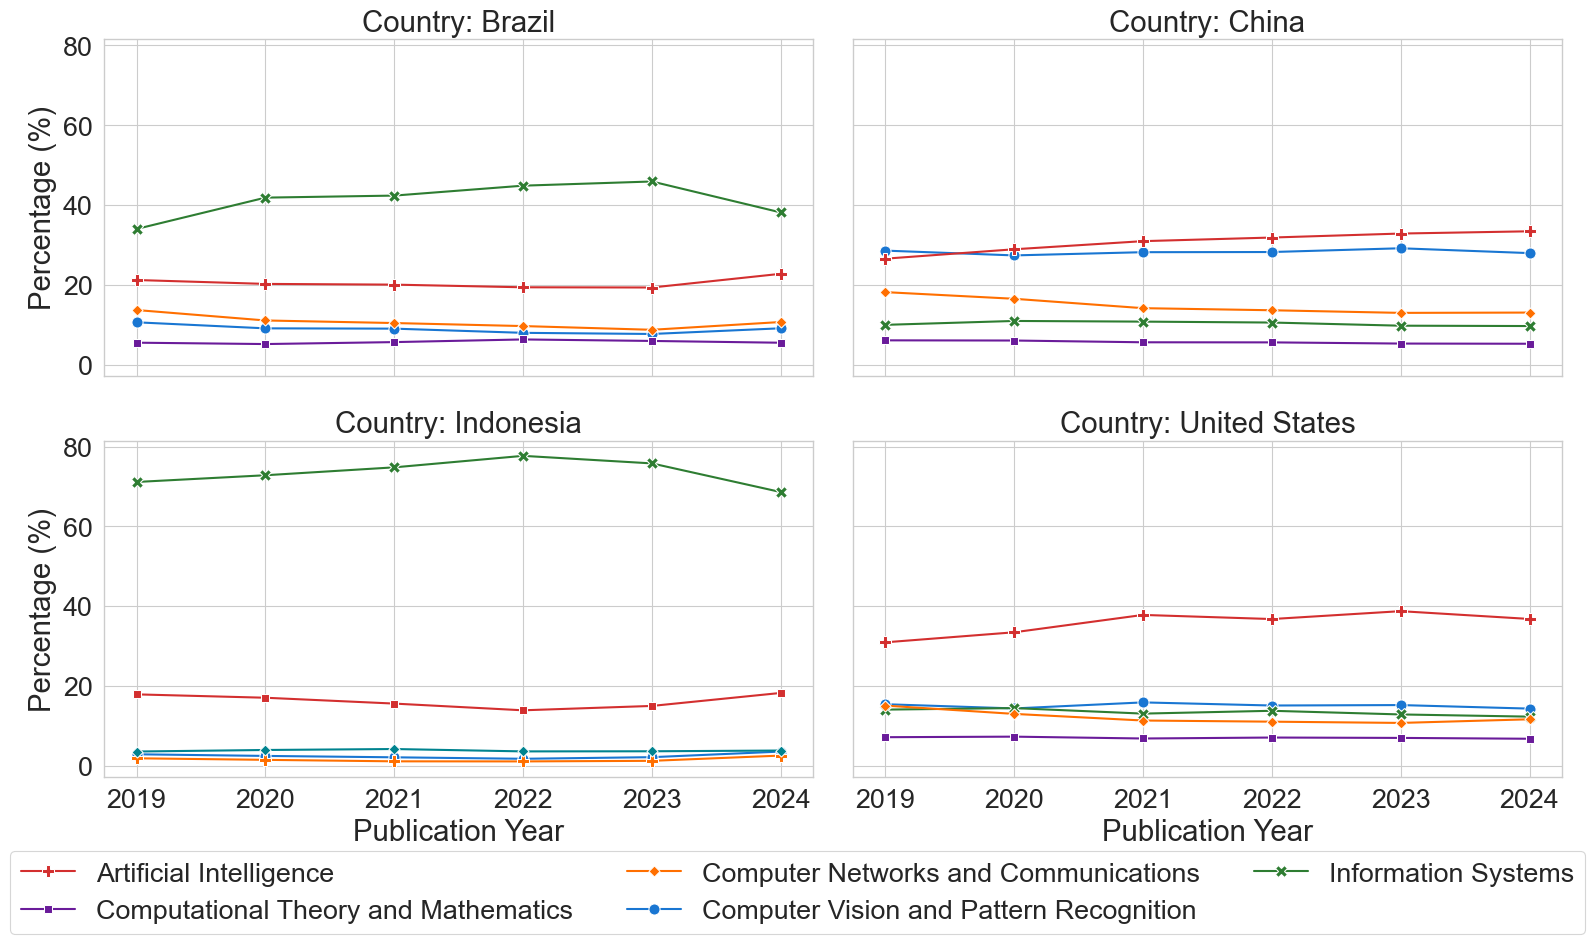

In [31]:
plot_publication_percentages_by_country(countries_subfields_df)
plt.show()

In [32]:
# plot_avg_citations_by_country(countries_subfields_df)
# plt.show()

In [33]:
# all_countries_df = pd.read_csv("../data/csv/elsevier_counts/all_countries_cs.csv")
# all_countries_df

In [34]:
# plot_publication_percentages_by_country(all_countries_df)
# plt.show()

In [35]:
# print colour palette keys and values, sorted by key
for key, value in sorted(color_palette.items()):
    print(key, value)

Artificial Intelligence #D32F2F
Computational Theory and Mathematics #6A1B9A
Computer Graphics and Computer-Aided Design #D6914B
Computer Networks and Communications #FF6F00
Computer Science Applications #00838F
Computer Vision and Pattern Recognition #1976D2
Hardware and Architecture #455A64
Human-Computer Interaction #CE59D4
Information Systems #2E7D32
Signal Processing #2CCFDB
Software #0ad600
